<div class="alert alert-block alert-success">

# <center> CS587 - Assignment 5 (Part I) </center>
## <center> Tracking and Improving the Sofwtare Project Quality </center>
## <center> Defect Removal Effectiveness </center>
    

</div>

<div class="alert alert-block alert-danger">
    
### Deliverables: 
- Submit a single ZIP file for both Part 1 & Part 2 that has the folowing items:
    1. Your PDF document for the analysis report. 
    2. Your IPYNB script with the name DRE_QM.ipynb that has your source code and output for the requirements listed 
    2. Your HTML/PDF document that has your source code and output for the requirements listed 

<br>
    
</div>


<div class="alert alert-info">

     
## High Level Description:

In this assignment, you will execute 5 experiments to assess the quality of the sofwtare project using different methods utilized by the project manager to track and improve the software project quality.
    
The project manager, attempted to utlize the following methods to improve the quality of the software product delivered in  the different releases of the software product:
1. Increase the duration of the task by 10%
2. Increase the number of reviewers on the review task from 4 to 5 

    
</div>




<hr style="border:5px solid orange"> </hr>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline



<div class="alert alert-info">   
    
### Read the DRE data Matrix from a CSV file or JSON file
    
</div>

In [2]:
# Reading Files
R1 = pd.read_excel('Release_R1_Matrix_Data.xlsx')
R2 = pd.read_excel('Release_R2_Matrix_Data.xlsx')
R3 = pd.read_excel('Release_R3_Matrix_Data.xlsx')
R4 = pd.read_excel('Release_R4_Matrix_Data.xlsx')
R5 = pd.read_excel('Release_R5_Matrix_Data.xlsx')


<div class="alert alert-info">  
    
### Create a stacked bar chart to plot the counts of the defects detection phase (Y-axis) for the origination phases (X-axis)

</div>

RELEASE 1 Y-axis: Detection Phase, X-axis: Origination Phase


<AxesSubplot:>

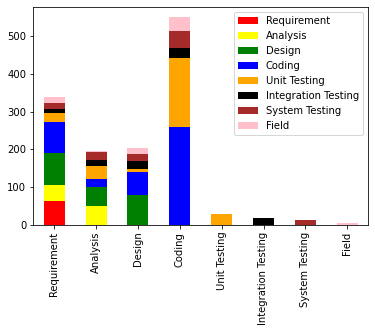

In [3]:
# Release 1
Release1 = R1.rename(index={0: "Requirement", 1: "Analysis", 2: "Design", 3: "Coding", 4: "Unit Testing", 5: "Integration Testing", 6: "System Testing", 7: "Field"})
R1_T = Release1.T[1:]
R1_T.reset_index(inplace=True)
R1_T.index=['Requirement','Analysis','Design','Coding','Unit Testing','Integration Testing','System Testing','Field']
R1_T.plot(kind='bar',stacked=True,color=['red', 'yellow', 'green', 'blue', 'orange','black','brown','pink'], grid=False)


RELEASE 2 Y-axis: Detection Phase, X-axis: Origination Phase

<AxesSubplot:>

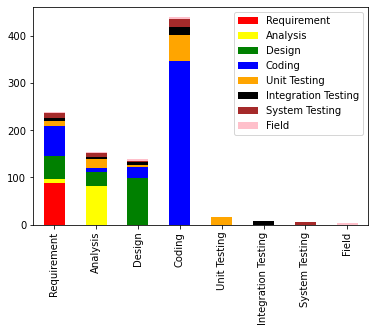

In [4]:
# Release 2
Release2 = R2.rename(index={0: "Requirement", 1: "Analysis", 2: "Design", 3: "Coding", 4: "Unit Testing", 5: "Integration Testing", 6: "System Testing", 7: "Field"})
R2_T = Release2.T[1:]
R2_T.reset_index(inplace=True)
R2_T.index=['Requirement','Analysis','Design','Coding','Unit Testing','Integration Testing','System Testing','Field']
R2_T.plot(kind='bar',stacked=True,color=['red', 'yellow', 'green', 'blue', 'orange','black','brown','pink'], grid=False)

RELEASE 3 Y-axis: Detection Phase, X-axis: Origination Phase

<AxesSubplot:>

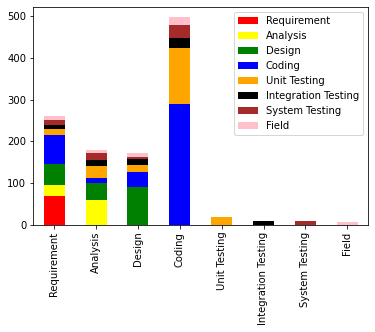

In [5]:
# Release 3 Plot
Release3 = R3.rename(index={0: "Requirement", 1: "Analysis", 2: "Design", 3: "Coding", 4: "Unit Testing", 5: "Integration Testing", 6: "System Testing", 7: "Field"})
R3_T = Release3.T[1:]
R3_T.reset_index(inplace=True)
R3_T.index=['Requirement','Analysis','Design','Coding','Unit Testing','Integration Testing','System Testing','Field']
R3_T.plot(kind='bar',stacked=True,color=['red', 'yellow', 'green', 'blue', 'orange','black','brown','pink'], grid=False)

RELEASE 4 Y-axis: Detection Phase, X-axis: Origination Phase

<AxesSubplot:>

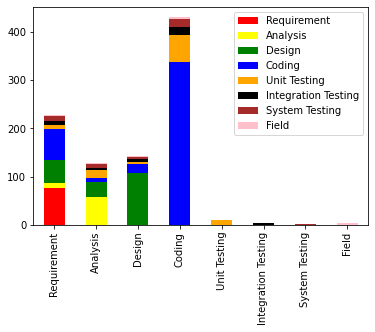

In [6]:
# Release 4 plot
Release4 = R4.rename(index={0: "Requirement", 1: "Analysis", 2: "Design", 3: "Coding", 4: "Unit Testing", 5: "Integration Testing", 6: "System Testing", 7: "Field"})
R4_T = Release4.T[1:]
R4_T.reset_index(inplace=True)
R4_T.index=['Requirement','Analysis','Design','Coding','Unit Testing','Integration Testing','System Testing','Field']
R4_T.plot(kind='bar',stacked=True,color=['red', 'yellow', 'green', 'blue', 'orange','black','brown','pink'], grid=False)

RELEASE 5 Y-axis: Detection Phase, X-axis: Origination Phase

<AxesSubplot:>

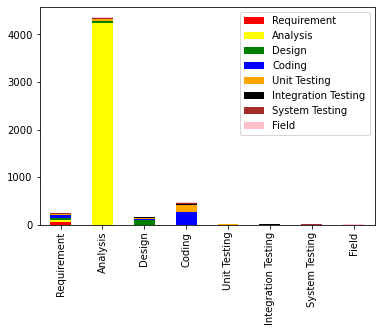

In [7]:
# Release 5 plot
Release5 = R5.rename(index={0: "Requirement", 1: "Analysis", 2: "Design", 3: "Coding", 4: "Unit Testing", 5: "Integration Testing", 6: "System Testing", 7: "Field"})
R5_T = Release5.T[1:]
R5_T.reset_index(inplace=True)
R5_T.index=['Requirement','Analysis','Design','Coding','Unit Testing','Integration Testing','System Testing','Field']
R5_T.plot(kind='bar',stacked=True,color=['red', 'yellow', 'green', 'blue', 'orange','black','brown','pink'], grid=False)



<div class="alert alert-info">   
    
### Create the functions to calculate the defect removal effectiveness for every phase & the overall defect removal effectiveness

- Defect Removal Effectiveness for development task = (Defects removed in current step / (Defects existing on step entry + Defects injected in current step)) * 100%

- Defect Removal Effectiveness for testing task = (Defects removed in current phase / (Defects removed in current phase + Defects removed in subsequent phases)) * 100%

    
</div>

DRE FOR R1

In [8]:
#DRE FOR R1

col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
col_append_release = ['Detected', 'Injected']

# Calculation of detected defects for each phase

R1['Detected'] = R1[col_release].sum(axis=1)

# Calculation of injected defects for each phase

Injected_Defects_For_Each_Phase_R1 = R1[col_release].sum().to_frame()
Injected_Defects_For_Each_Phase_R1.reset_index(inplace=True)
R1['Injected'] = Injected_Defects_For_Each_Phase_R1[0]

# Calculation of defects escaped for each phase

R1['Escaped'] = R1['Injected'] - R1['Detected']
R1['Escaped'] = R1['Escaped'].cumsum()

# Calculation of defects on each step entry

Defects_On_Step_Entry_R1 = R1
for index,row in Defects_On_Step_Entry_R1.iterrows():
    if index == 0:
        Defects_On_Step_Entry_R1['DefectsOnStepEntry'] = 0
    else:
        Defects_On_Step_Entry_R1['DefectsOnStepEntry'][index] = Defects_On_Step_Entry_R1['Escaped'][index-1]

R1 = Defects_On_Step_Entry_R1

# Calculation of DRE for each step

DRE_R1_DEV = R1
DRE_R1_DEV['DRE'] = DRE_R1_DEV[0:4]['Detected']/(DRE_R1_DEV[0:4]['DefectsOnStepEntry'] + DRE_R1_DEV[0:4]['Injected'])*100
R1 = DRE_R1_DEV
DRE_R1_TEST = R1

for index,rows in DRE_R1_TEST[4:7].iterrows():
    DRE_R1_TEST['DRE'][index:7] = DRE_R1_TEST.at[index, 'Detected']/DRE_R1_TEST[index:]['Detected'].sum() * 100

R1 = DRE_R1_TEST

R1

Detection Phase/Origination Phase  Requirement  Analysis  Design  Coding  \
0                       Requirement           62       NaN     NaN     NaN   
1                          Analysis           43      49.0     NaN     NaN   
2                            Design           86      51.0    78.0     NaN   
3                            Coding           81      21.0    61.0   258.0   
4                      Unit Testing           23      35.0     8.0   185.0   
5               Integration Testing           11      15.0    21.0    27.0   
6                    System Testing           18      21.0    19.0    43.0   
7                             Field           16       3.0    15.0    37.0   

   Unit Testing  Integration Testing  System Testing  Field  Detected  \
0           NaN                  NaN             NaN    NaN      62.0   
1           NaN                  NaN             NaN    NaN      92.0   
2           NaN                  NaN             NaN    NaN     215.0   
3           NaN                  NaN             NaN    NaN     421.0   
4          29.0                  NaN             NaN    NaN     280.0   
5           NaN                 18.0             NaN    NaN      92.0   
6           NaN                  NaN            13.0    NaN     114.0   
7           NaN                  NaN             NaN    5.0      76.0   

   Injected  Escaped  DefectsOnStepEntry        DRE  
0     340.0    278.0                   0  18.235294  
1     195.0    381.0                 278  19.450317  
2     202.0    368.0                 381  36.878216  
3     550.0    497.0                 368  45.860566  
4      29.0    246.0                 497  49.822064  
5      18.0    172.0                 246  32.624113  
6      13.0     71.0                 172  60.000000  
7       5.0      0.0                  71        NaN

DRE FOR R2

In [9]:
#DRE FOR R2

col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
col_append_release = ['Detected', 'Injected']

# Calculation of detected defects for each phase

R2['Detected'] = R2[col_release].sum(axis=1)

# Calculation of injected defects for each phase

Injected_Defects_For_Each_Phase_R2 = R2[col_release].sum().to_frame()
Injected_Defects_For_Each_Phase_R2.reset_index(inplace=True)
R2['Injected'] = Injected_Defects_For_Each_Phase_R2[0]

# Calculation of defects escaped for each phase

R2['Escaped'] = R2['Injected'] - R2['Detected']
R2['Escaped'] = R2['Escaped'].cumsum()

# Calculation of defects on each step entry

Defects_On_Step_Entry_R2 = R2
for index,row in Defects_On_Step_Entry_R2.iterrows():
    if index == 0:
        Defects_On_Step_Entry_R2['DefectsOnStepEntry'] = 0
    else:
        Defects_On_Step_Entry_R2['DefectsOnStepEntry'][index] = Defects_On_Step_Entry_R2['Escaped'][index-1]

R2 = Defects_On_Step_Entry_R2

# Calculation of DRE for each step

DRE_R2_DEV = R2
DRE_R2_DEV['DRE'] = DRE_R2_DEV[0:4]['Detected']/(DRE_R2_DEV[0:4]['DefectsOnStepEntry'] + DRE_R2_DEV[0:4]['Injected'])*100
R2 = DRE_R2_DEV
DRE_R2_TEST = R2

for index,rows in DRE_R2_TEST[4:7].iterrows():
    DRE_R2_TEST['DRE'][index:7] = DRE_R2_TEST.at[index, 'Detected']/DRE_R2_TEST[index:]['Detected'].sum() * 100

R2 = DRE_R2_TEST

R2

Detection Phase/Origination Phase  Requirement  Analysis  Design  Coding  \
0                       Requirement           88       NaN     NaN     NaN   
1                          Analysis            9      81.0     NaN     NaN   
2                            Design           48      31.0    99.0     NaN   
3                            Coding           65       9.0    23.0   347.0   
4                      Unit Testing            9      18.0     5.0    56.0   
5               Integration Testing            7       5.0     6.0    17.0   
6                    System Testing           11       7.0     3.0    16.0   
7                             Field            3       4.0     3.0     4.0   

   Unit Testing  Integration Testing  System Testing  Field  Detected  \
0           NaN                  NaN             NaN    NaN      88.0   
1           NaN                  NaN             NaN    NaN      90.0   
2           NaN                  NaN             NaN    NaN     178.0   
3           NaN                  NaN             NaN    NaN     444.0   
4          17.0                  NaN             NaN    NaN     105.0   
5           NaN                  8.0             NaN    NaN      43.0   
6           NaN                  NaN             5.0    NaN      42.0   
7           NaN                  NaN             NaN    4.0      18.0   

   Injected  Escaped  DefectsOnStepEntry        DRE  
0     240.0    152.0                   0  36.666667  
1     155.0    217.0                 152  29.315961  
2     139.0    178.0                 217  50.000000  
3     440.0    174.0                 178  71.844660  
4      17.0     86.0                 174  50.480769  
5       8.0     51.0                  86  41.747573  
6       5.0     14.0                  51  70.000000  
7       4.0      0.0                  14        NaN

DRE FOR R3

In [10]:
#DRE FOR R3

# Consider row names in a list

col_release = ['Requirement','Analysis','Design','Coding','Unit Testing','Integration Testing','System Testing','Field']
col_append_release = ['Detected', 'Injected']

# Calculation of detected defects for each phase

R3['Detected'] = R3[col_release].sum(axis=1)

# Calculation of injected defects for each phase

Injected_Defects_For_Each_Phase_R3 = R3[col_release].sum().to_frame()
Injected_Defects_For_Each_Phase_R3.reset_index(inplace=True)
R3['Injected'] = Injected_Defects_For_Each_Phase_R3[0]

# Calculation of defects escaped for each phase

R3['Escaped'] = R3['Injected'] - R3['Detected']
R3['Escaped'] = R3['Escaped'].cumsum()

# Calculation of defects on each step entry

Defects_On_Step_Entry_R3 = R3
for index,row in Defects_On_Step_Entry_R3.iterrows():
    if index == 0:
        Defects_On_Step_Entry_R3['DefectsOnStepEntry'] = 0
    else:
        Defects_On_Step_Entry_R3['DefectsOnStepEntry'][index] = Defects_On_Step_Entry_R3['Escaped'][index-1]

R3 = Defects_On_Step_Entry_R3

# Calculation of DRE for each step

DRE_R3_DEV = R3
DRE_R3_DEV['DRE'] = DRE_R3_DEV[0:4]['Detected']/(DRE_R3_DEV[0:4]['DefectsOnStepEntry'] + DRE_R3_DEV[0:4]['Injected'])*100
R3 = DRE_R3_DEV
DRE_R3_TEST = R3

for index,rows in DRE_R3_TEST[4:7].iterrows():
    DRE_R3_TEST['DRE'][index:7] = DRE_R3_TEST.at[index, 'Detected']/DRE_R3_TEST[index:]['Detected'].sum() * 100

R3 = DRE_R3_TEST

R3

Detection Phase/Origination Phase  Requirement  Analysis  Design  Coding  \
0                       Requirement           69       NaN     NaN     NaN   
1                          Analysis           26      59.0     NaN     NaN   
2                            Design           51      41.0    89.0     NaN   
3                            Coding           69      11.0    38.0   289.0   
4                      Unit Testing           14      30.0    15.0   134.0   
5               Integration Testing           10      15.0    16.0    24.0   
6                    System Testing           13      16.0     5.0    33.0   
7                             Field            8       7.0     9.0    17.0   

   Unit Testing  Integration Testing  System Testing  Field  Detected  \
0           NaN                  NaN             NaN    NaN      69.0   
1           NaN                  NaN             NaN    NaN      85.0   
2           NaN                  NaN             NaN    NaN     181.0   
3           NaN                  NaN             NaN    NaN     407.0   
4          19.0                  NaN             NaN    NaN     212.0   
5           NaN                  9.0             NaN    NaN      74.0   
6           NaN                  NaN             9.0    NaN      76.0   
7           NaN                  NaN             NaN    6.0      47.0   

   Injected  Escaped  DefectsOnStepEntry        DRE  
0     260.0    191.0                   0  26.538462  
1     179.0    285.0                 191  22.972973  
2     172.0    276.0                 285  39.606127  
3     497.0    366.0                 276  52.652005  
4      19.0    173.0                 366  51.833741  
5       9.0    108.0                 173  37.563452  
6       9.0     41.0                 108  61.788618  
7       6.0      0.0                  41        NaN

DRE FOR R4

In [11]:
#DRE FOR R4
# Consider row names in a list

col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
col_append_release = ['Detected', 'Injected']

# Calculation of detected defects for each phase

R4['Detected'] = R4[col_release].sum(axis=1)

# Calculation of injected defects for each phase

Injected_Defects_For_Each_Phase_R4 = R4[col_release].sum().to_frame()
Injected_Defects_For_Each_Phase_R4.reset_index(inplace=True)
R4['Injected'] = Injected_Defects_For_Each_Phase_R4[0]

# Calculation of defects escaped for each phase

R4['Escaped'] = R4['Injected'] - R4['Detected']
R4['Escaped'] = R4['Escaped'].cumsum()

# Calculation of defects on each step entry

Defects_On_Step_Entry_R4 = R4
for index,row in Defects_On_Step_Entry_R4.iterrows():
    if index == 0:
        Defects_On_Step_Entry_R4['DefectsOnStepEntry'] = 0
    else:
        Defects_On_Step_Entry_R4['DefectsOnStepEntry'][index] = Defects_On_Step_Entry_R4['Escaped'][index-1]

R4 = Defects_On_Step_Entry_R4

# Calculation of DRE for each step
DRE_R4_DEV = R4
DRE_R4_DEV['DRE'] = DRE_R4_DEV[0:4]['Detected']/(DRE_R4_DEV[0:4]['DefectsOnStepEntry'] + DRE_R4_DEV[0:4]['Injected'])*100
R4 = DRE_R4_DEV
DRE_R4_TEST = R4

for index,rows in DRE_R4_TEST[4:7].iterrows():
    DRE_R4_TEST['DRE'][index:7] = DRE_R4_TEST.at[index, 'Detected']/DRE_R4_TEST[index:]['Detected'].sum() * 100

R4 = DRE_R4_TEST

R4

Detection Phase/Origination Phase  Requirement  Analysis  Design  Coding  \
0                       Requirement           77       NaN     NaN     NaN   
1                          Analysis            9      57.0     NaN     NaN   
2                            Design           48      31.0   107.0     NaN   
3                            Coding           65       9.0    19.0   339.0   
4                      Unit Testing            9      16.0     5.0    56.0   
5               Integration Testing            7       5.0     6.0    17.0   
6                    System Testing           11       7.0     3.0    16.0   
7                             Field            2       3.0     2.0     3.0   

   Unit Testing  Integration Testing  System Testing  Field  Detected  \
0           NaN                  NaN             NaN    NaN      77.0   
1           NaN                  NaN             NaN    NaN      66.0   
2           NaN                  NaN             NaN    NaN     186.0   
3           NaN                  NaN             NaN    NaN     432.0   
4           9.0                  NaN             NaN    NaN      95.0   
5           NaN                  4.0             NaN    NaN      39.0   
6           NaN                  NaN             1.0    NaN      38.0   
7           NaN                  NaN             NaN    3.0      13.0   

   Injected  Escaped  DefectsOnStepEntry        DRE  
0     228.0    151.0                   0  33.771930  
1     128.0    213.0                 151  23.655914  
2     142.0    169.0                 213  52.394366  
3     431.0    168.0                 169  72.000000  
4       9.0     82.0                 168  51.351351  
5       4.0     47.0                  82  43.333333  
6       1.0     10.0                  47  74.509804  
7       3.0      0.0                  10        NaN

DRE FOR R5

In [12]:
#DRE FOR R5
# Consider row names in a list
col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
col_append_release = ['Detected', 'Injected']

# Calculation of detected defects for each phase

R5['Detected'] = R5[col_release].sum(axis=1)

# Calculation of injected defects for each phase

Injected_Defects_For_Each_Phase_R5 = R5[col_release].sum().to_frame()
Injected_Defects_For_Each_Phase_R5.reset_index(inplace=True)
R5['Injected'] = Injected_Defects_For_Each_Phase_R5[0]

# Calculation of defects escaped for each phase

R5['Escaped'] = R5['Injected'] - R5['Detected']
R5['Escaped'] = R5['Escaped'].cumsum()

# Calculation of defects on each step entry

Defects_On_Step_Entry_R5 = R5
for index,row in Defects_On_Step_Entry_R5.iterrows():
    if index == 0:
        Defects_On_Step_Entry_R5['DefectsOnStepEntry'] = 0
    else:
        Defects_On_Step_Entry_R5['DefectsOnStepEntry'][index] = Defects_On_Step_Entry_R5['Escaped'][index-1]
R5 = Defects_On_Step_Entry_R5

# Calculation of DRE for each step

DRE_R5_DEV = R5
DRE_R5_DEV['DRE'] = DRE_R5_DEV[0:4]['Detected']/(DRE_R5_DEV[0:4]['DefectsOnStepEntry'] + DRE_R5_DEV[0:4]['Injected'])*100
R5 = DRE_R5_DEV
DRE_R5_TEST = R5

for index,rows in DRE_R5_TEST[4:7].iterrows():
    DRE_R5_TEST['DRE'][index:7] = DRE_R5_TEST.at[index, 'Detected']/DRE_R5_TEST[index:]['Detected'].sum() * 100
R5 = DRE_R5_TEST
R5

Detection Phase/Origination Phase  Requirement  Analysis  Design  Coding  \
0                       Requirement           61       NaN     NaN     NaN   
1                          Analysis           26    4239.0     NaN     NaN   
2                            Design           51      41.0    86.0     NaN   
3                            Coding           69      11.0    34.0   267.0   
4                      Unit Testing           14      30.0    15.0   134.0   
5               Integration Testing            9      15.0    16.0    23.0   
6                    System Testing           13      16.0     5.0    33.0   
7                             Field            7       6.0     8.0    16.0   

   Unit Testing  Integration Testing  System Testing  Field  Detected  \
0           NaN                  NaN             NaN    NaN      61.0   
1           NaN                  NaN             NaN    NaN    4265.0   
2           NaN                  NaN             NaN    NaN     178.0   
3           NaN                  NaN             NaN    NaN     381.0   
4          15.0                  NaN             NaN    NaN     208.0   
5           NaN                  6.0             NaN    NaN      69.0   
6           NaN                  NaN             4.0    NaN      71.0   
7           NaN                  NaN             NaN    4.0      41.0   

   Injected  Escaped  DefectsOnStepEntry        DRE  
0     250.0    189.0                   0  24.400000  
1    4358.0    282.0                 189  93.798109  
2     164.0    268.0                 282  39.910314  
3     473.0    360.0                 268  51.417004  
4      15.0    167.0                 360  53.470437  
5       6.0    104.0                 167  38.121547  
6       4.0     37.0                 104  63.392857  
7       4.0      0.0                  37        NaN

# Overall DRE

RELEASE 1 OVERALL DRE

In [13]:
#Release 1
Overall_DRE_R1 = R1
col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
Sum_of_all_Defects_R1 = Overall_DRE_R1[col_release].sum(axis=1).sum()
Defects_in_Field_R1 = Overall_DRE_R1.at[7,'Detected']
Overall_DRE_R1 = (1 - Defects_in_Field_R1/Sum_of_all_Defects_R1)*100
Overall_DRE_R1

94.37869822485207

RELEASE 2 OVERALL DRE

In [14]:
#Release 2
Overall_DRE_R2 = R2
col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
Sum_of_all_Defects_R2 = Overall_DRE_R2[col_release].sum(axis=1).sum()
Defects_in_Field_R2 = Overall_DRE_R2.at[7,'Detected']
Overall_DRE_R2 = (1 - Defects_in_Field_R2/Sum_of_all_Defects_R2)*100
Overall_DRE_R2

98.21428571428571

RELEASE 3 OVERALL DRE

In [15]:
#Release 3
Overall_DRE_R3 = R3
col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
Sum_of_all_Defects_R3 = Overall_DRE_R3[col_release].sum(axis=1).sum()
Defects_in_Field_R3 = Overall_DRE_R3.at[7,'Detected']
Overall_DRE_R3 = (1 - Defects_in_Field_R3/Sum_of_all_Defects_R3)*100
Overall_DRE_R3

95.91659426585578

RELEASE 4 OVERALL DRE

In [16]:
#Release 4
Overall_DRE_R4 = R4
col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
Sum_of_all_Defects_R4 = Overall_DRE_R4[col_release].sum(axis=1).sum()
Defects_in_Field_R4 = Overall_DRE_R4.at[7,'Detected']
Overall_DRE_R4 = (1 - Defects_in_Field_R4/Sum_of_all_Defects_R4)*100
Overall_DRE_R4

98.62579281183932

RELEASE 5 OVERALL DRE

In [17]:
#Release 5
Overall_DRE_R5 = R5
col_release = ['Requirement','Analysis','Design','Coding','Unit Testing', 'Integration Testing', 'System Testing', 'Field']
Sum_of_all_Defects_R5 = Overall_DRE_R5[col_release].sum(axis=1).sum()
Defects_in_Field_R5 = Overall_DRE_R5.at[7,'Detected']
Overall_DRE_R5 = (1 - Defects_in_Field_R5/Sum_of_all_Defects_R5)*100
Overall_DRE_R5

99.22260144103147